# Image Segmentation

The main objectives of this module are:

* Use & compare different methods of segmentation:
    * Histogram-based
    * Texture-based
    * Region growing
* Detect objects and extract object features.
* Understand corner detection and basic object recognition

## 1. Histogram segmentation

In histogram segmentation, we make the hypothesis that the histogram is composed of distinct separable distributions, and we try to find the best threshold to separate those distributions.

The code below uses a default threshold of 127 to segment the image. Modify it to:

1. Create a function to compute the optimal threshold for an 8 bit image. Apply on the cameraman image.
1. Compute the Otsu threshold for an 8-bit image, by optimizing within variance or inter-class variance for each possible theshold *t*. See [here](http://nbviewer.jupyter.org/github/odebeir/info-h-500-501/blob/ver_2016-2017/04-Image%20segmentation/01-Histogram%20based%20image%20segmentation.ipynb) how to compute the Otsu threshold.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


def show_image(image, my_cmap = cm.gray):
    #cm.jet for color
    plt.imshow(image,interpolation='nearest',cmap=my_cmap,vmin=image.min()+1, vmax=image.max()-1)
    plt.colorbar()
    plt.show()
    
def show_cumulated_histogram(image, is_plot=False):
    # Normalized histogram
    histogram=[(image==v).sum() for v in range(256)]
    h = np.array(histogram)
    norm_h = h/h.sum() #h.sum() compute the sum of all array's values. It allows to normalize
    if is_plot:
        plt.figure()
        plt.bar(range(256),norm_h)
        plt.show()
    
    # Cumulated histogram
    h_cumul = np.zeros(256)
    for i in range(256):
        h_cumul[i] = norm_h[i]+h_cumul[i-1] #When i=0, h_cumul[0] = norm_h[0]+h_cumul[-1] where h_cumul[-1]=0
                                                #because of the way we def. h_cumul
    
    plt.figure()
    plt.plot(range(256),h_cumul)
    plt.show()
    
    return h_cumul

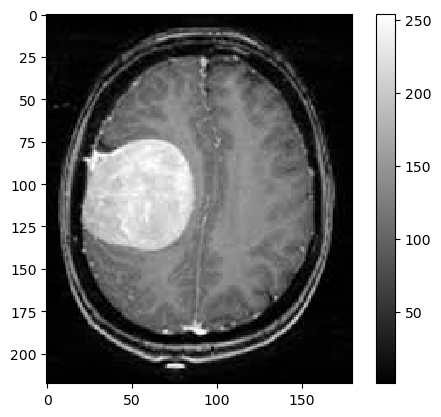

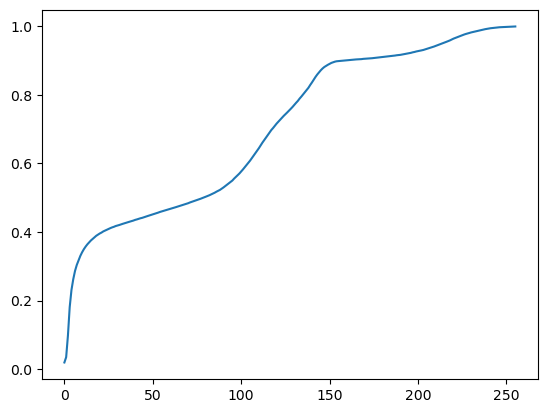

m1 75; m2 245; t2 160
m1 61; m2 212; t2 136
m1 51; m2 177; t2 114
m1 36; m2 156; t2 96
m1 21; m2 143; t2 82
m1 15; m2 138; t2 76
m1 14; m2 136; t2 75
m1 13; m2 136; t2 75
75


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread, imshow

def manual_threshold(im, T):
    return im>T

def optimal_threshold(h,t):
    # Cut distribution in 2
    h1 = h[:t]
    h2 = h[t:]
    
    # Compute the centroids
    m1 = (h1*np.arange(0,t)).sum()/h1.sum()
    m2 = (h2*np.arange(t,len(h))).sum()/h2.sum()
    
    # Compute the new threshold
    t2 = int(np.round((m1+m2)/2))
    print("m1 %2.f; m2 %2.f; t2 %2.f"%(m1,m2,t2))
    
    if( t2 != t ) : return optimal_threshold(h,t2)
    return t2

initial_im = imread("mri_brain.jpg")
im = initial_im[:,:,0]
show_image(im)
show_cumulated_histogram(im)

h,bins = np.histogram(im,range(257))
t = optimal_threshold(h,240)
print(t)


    
def otsu_threshold(h):
    h = h*1./h.sum() # Probability histogram
    
    # Check every possible threshold
    var_within = np.zeros(len(h))
    var_between = np.zeros(len(h))
    sep = np.zeros(len(h))
    
    for t in range(1,len(h)-1):
        # Class probabilities
        w1 = h[:t].sum()
        w2 = h[t:].sum()
        # Class means
        m1 = (np.arange(0,t)*h[:t]).sum()/w1
        m2 = (np.arange(t,len(h))*h[t:]).sum()/w2
        # Class variances
        s1 = (((np.arange(0,t)-m1)**2)*h[:t]).sum()/w1
        s2 = (((np.arange(t,len(h))-m2)**2)*h[t:]).sum()/w2
        # Intra-class
        sw = w1*s1+w2*s2
        # Inter-class
        sb = w1*w2*((m2-m1)**2)
        # Separability
        var_within[t] = sw
        var_between[t] = sb
    
    sep[1:-1] = var_between[1:-1]/var_within[1:-1]
    best_t = np.argmax(sep)
    
    res = best_t
    return res

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


def show_image(image, my_cmap = cm.gray):
    #cm.jet for color
    plt.imshow(image,interpolation='nearest',cmap=my_cmap,vmin=image.min()+1, vmax=image.max()-1)
    plt.colorbar()
    plt.show()
def plot_histogram_with_threshold(im, T):
    plt.figure(figsize=(15,5))
    h = plt.hist(im.flatten(), bins=range(256))
    plt.plot([T,T],[0,h[0].max()], 'r-')
    plt.show()

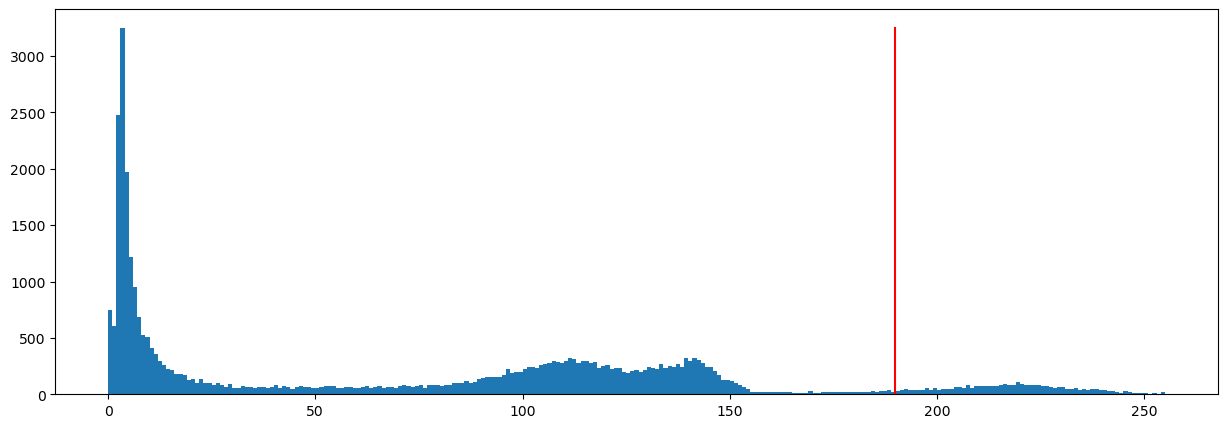

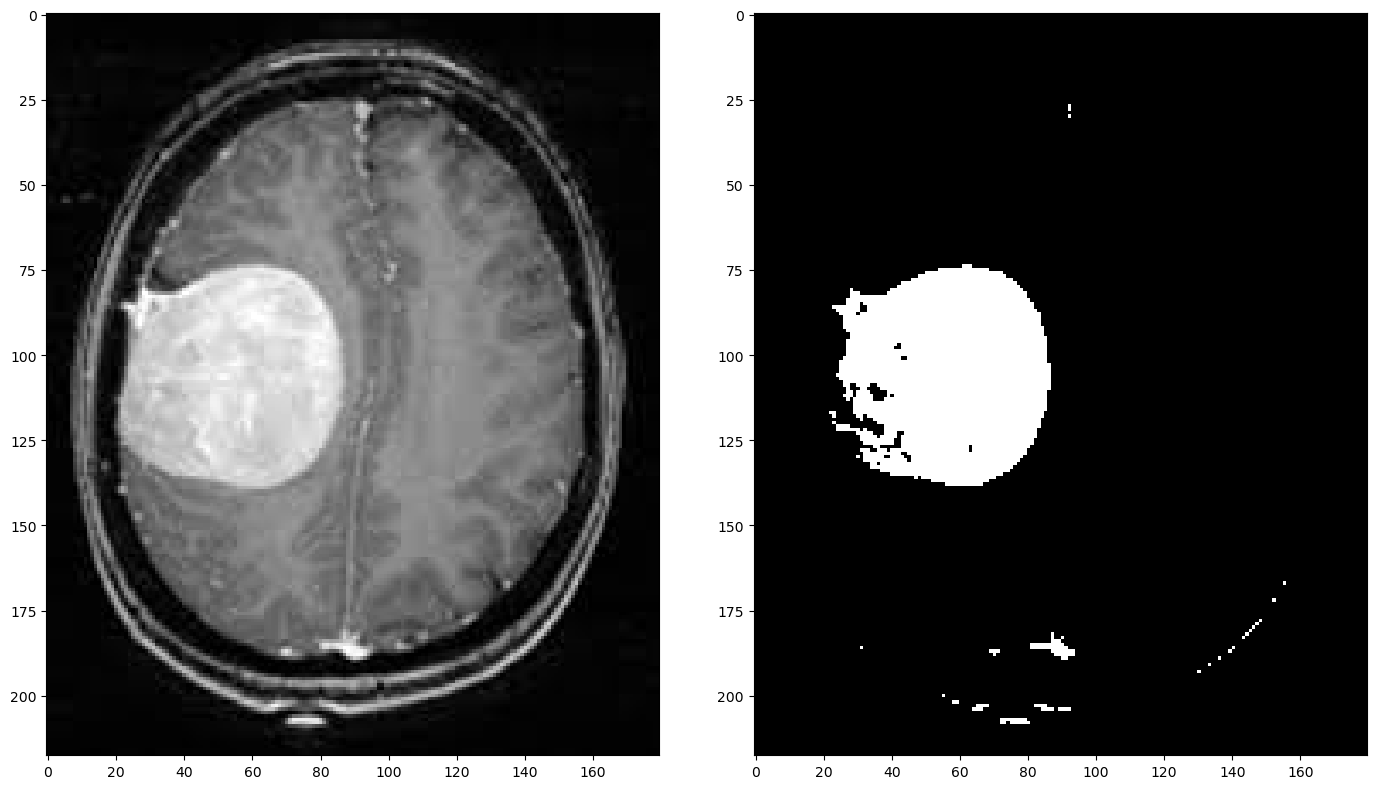

In [108]:
def compare_treshold(im,T):
    im_segmented = manual_threshold(im, T)

    plot_histogram_with_threshold(im, T)

    # Show original image & segmented binary image
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    imshow(im)
    plt.subplot(1,2,2)
    imshow(im_segmented)
    plt.show()

T = 190
compare_treshold(im,T)


value : 143.0
m1 64; m2 221; t2 143 
value : 123.0
m1 56; m2 190; t2 123 
value : 103.0
m1 43; m2 164; t2 103 
value : 87.0
m1 26; m2 147; t2 87 
value : 78.0
m1 17; m2 139; t2 78 
value : 75.0
m1 14; m2 137; t2 75 
value : 75.0
m1 13; m2 136; t2 75 
optimal_threshold : 75 



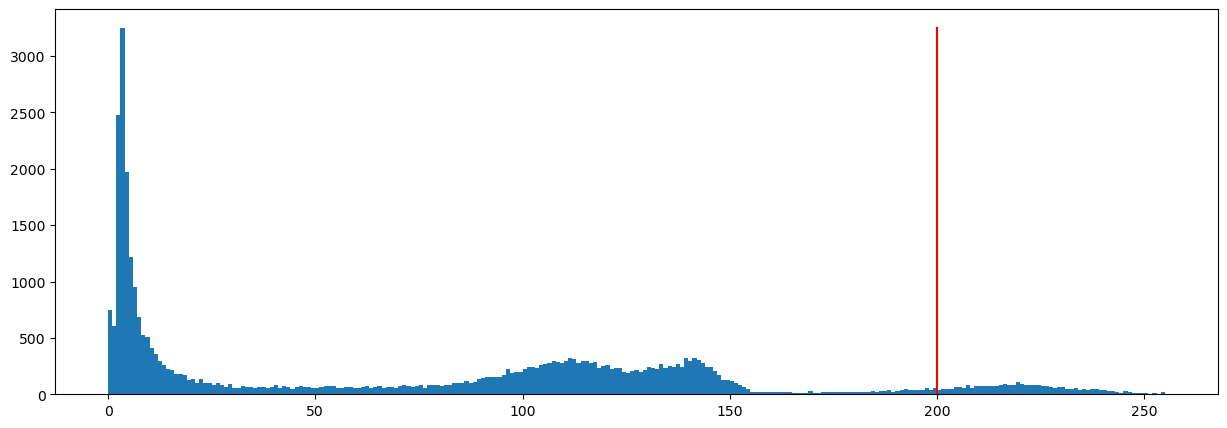

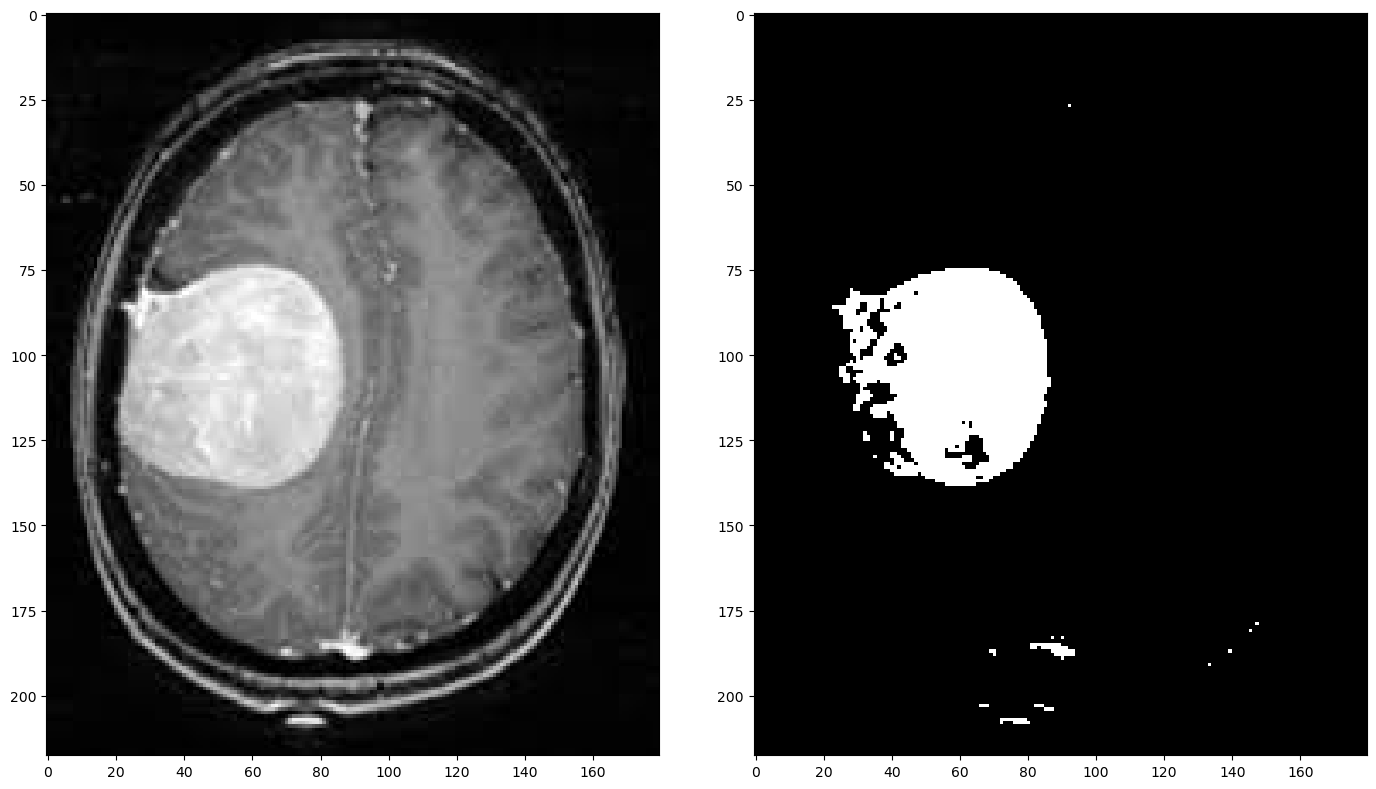

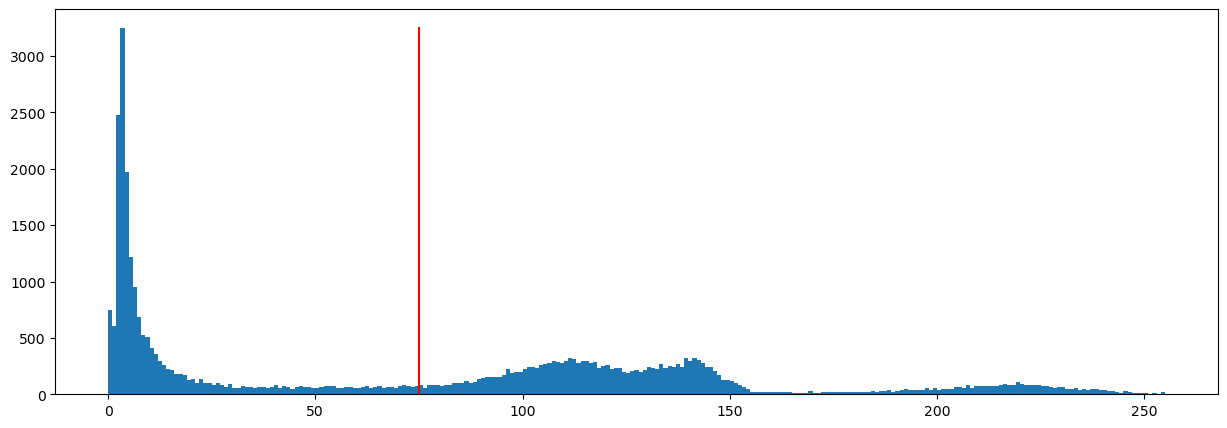

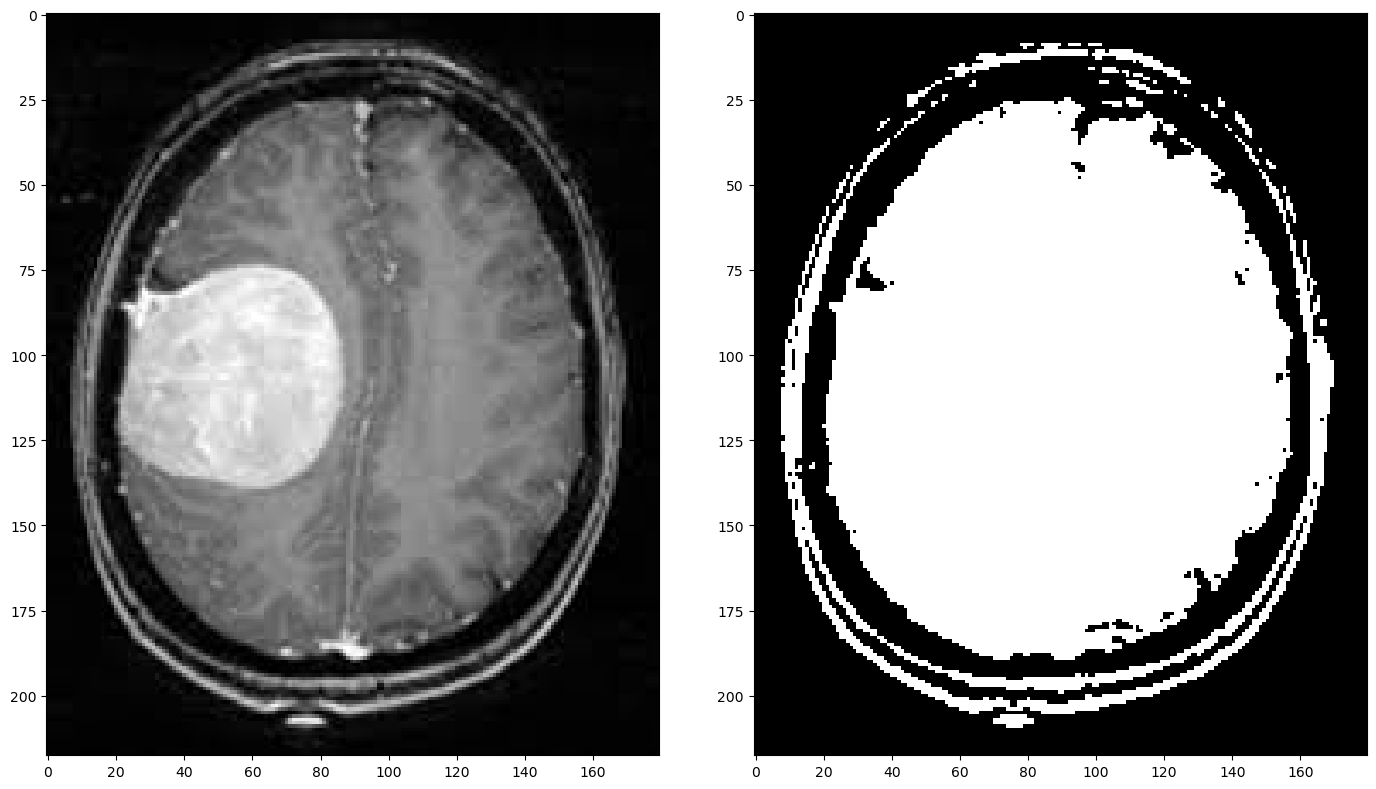

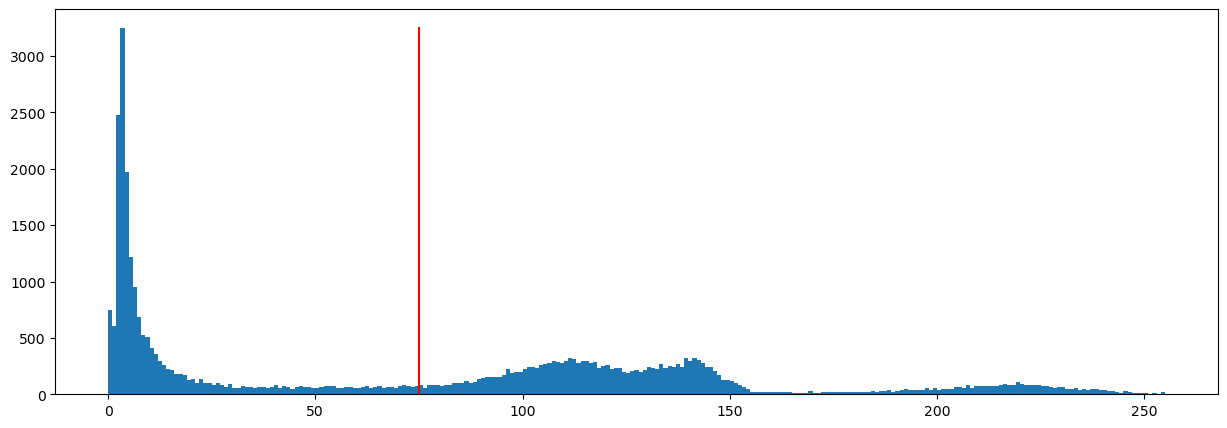

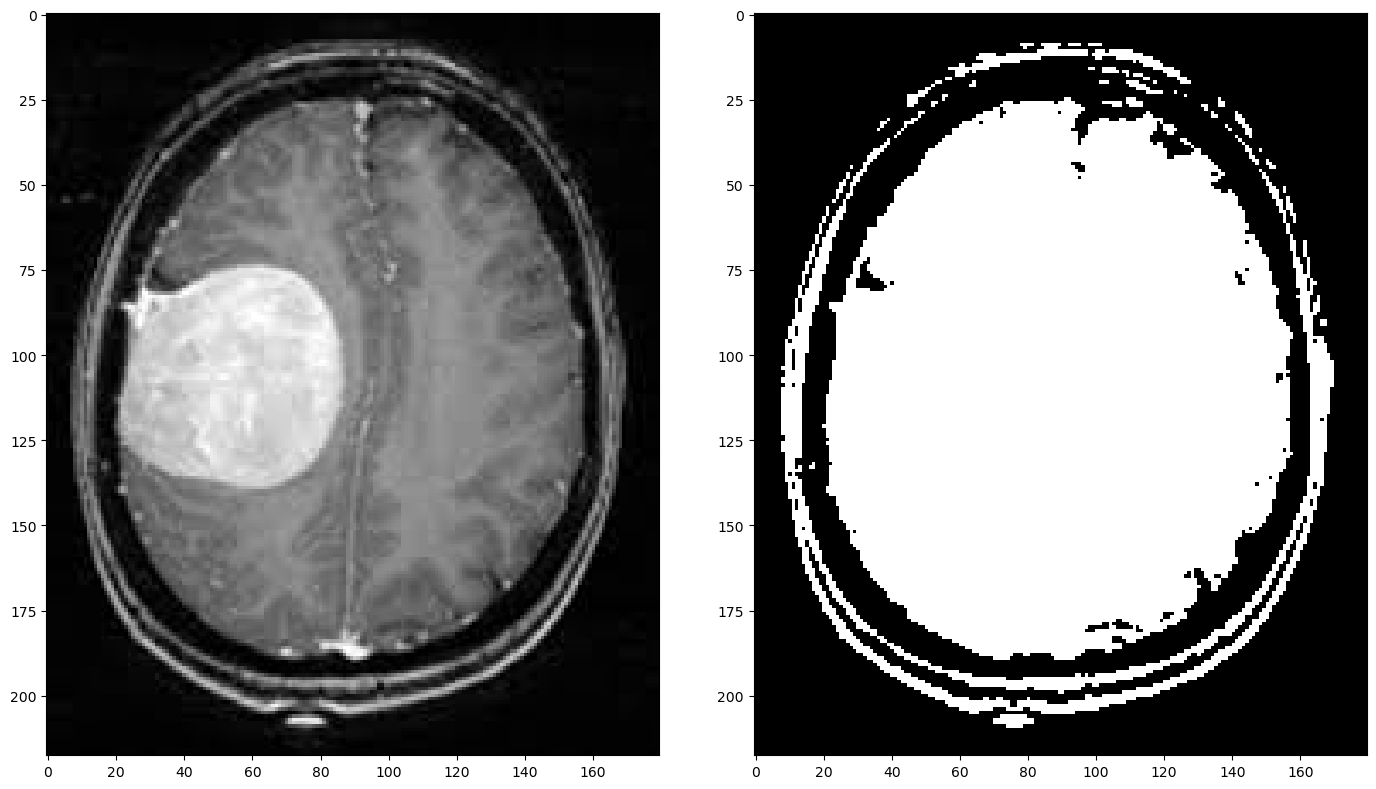

In [109]:
def optimal_threshold(h,t):
    # Cut distribution in 2
    h1 = h[:t]
    h2 = h[t:]
    
    # Compute the centroids
    m1 = (h1*np.arange(0,t)).sum()/h1.sum()
    m2 = (h2*np.arange(t,len(h))).sum()/h2.sum()
    
    # Compute the new threshold
    value = np.round((m1+m2)/2)
    print("value :",value)
    t2 = int(value)
    print("m1 %2.f; m2 %2.f; t2 %2.f "%(m1,m2,t2))
    
    if( t2 != t ) : return optimal_threshold(h,t2)
    return t2

#show_image(im)
T=200

h,bins = np.histogram(im,range(257))
opti_t = optimal_threshold(h,T); print("optimal_threshold :",opti_t,"\n")

otsu_t = otsu_threshold(h)
compare_treshold(im,T)
compare_treshold(im,opti_t)
compare_treshold(im,otsu_t)

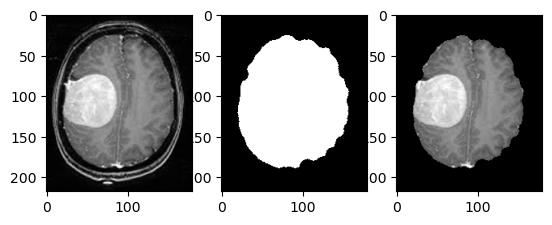

In [75]:
from skimage.morphology import opening,closing,disk

mask = im>t
mask = closing(opening(mask, disk(5)),disk(7)) #Allows to clean up the noisy image

im_m = im.copy()
im_m[mask==False] = 0

plt.figure()
plt.subplot(1,3,1)
plt.imshow(im, cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(mask, cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(im_m, cmap=plt.cm.gray)
plt.show()

initial_im.shape : (450, 800, 3) 



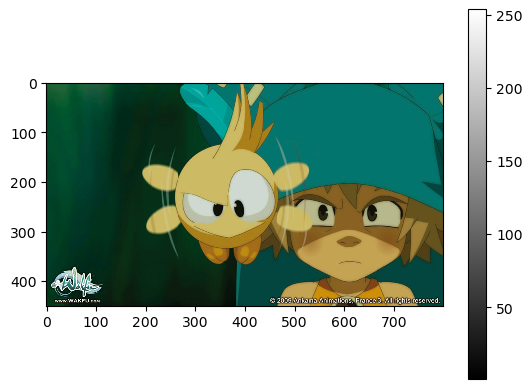

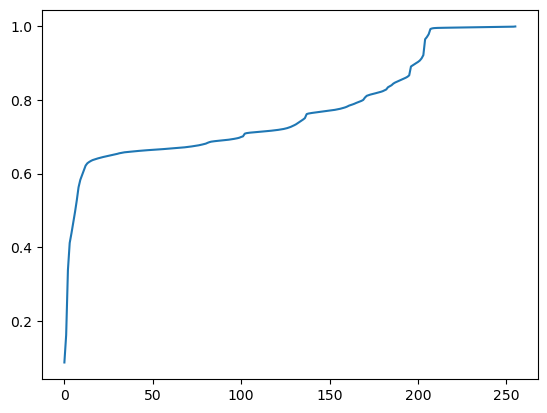

im.shape : (450, 800) 

get_descr(region) : [8057.753103588659, 6842.65845900181, 6695.668769258648]
size_x : 53/ size_y : 45
descriptors.max(axis=(0,1) : [486.5442081 486.5442081 486.5442081]


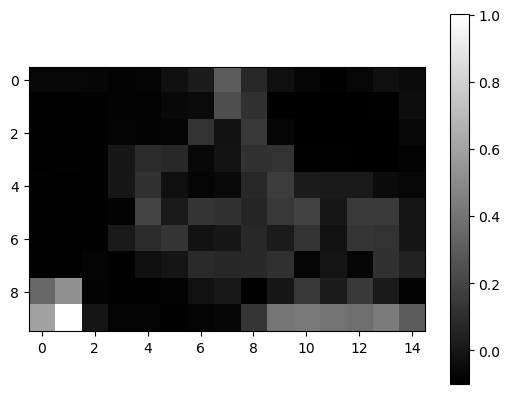

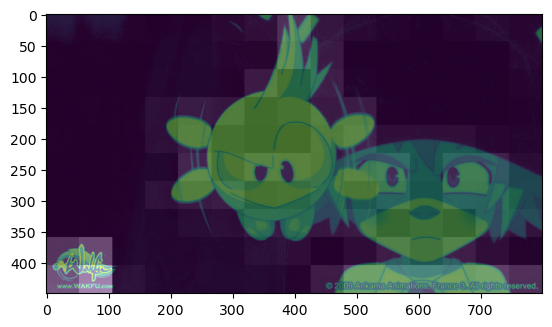

reference : [0.09324108 0.09324108 0.09324108]


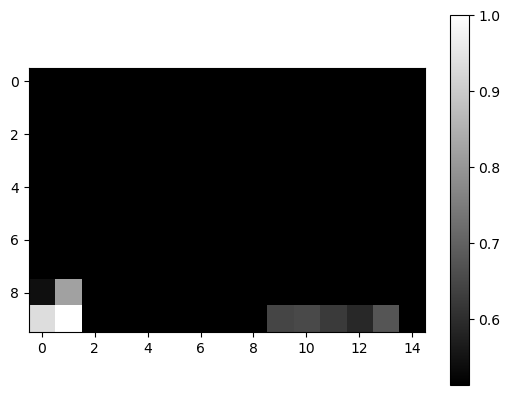

In [44]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.io import imread,imsave

initial_im = imread("Wakfu_troll.jpg")
print("initial_im.shape :",initial_im.shape,"\n")
im = initial_im[:,:,0]
show_image(initial_im)
show_cumulated_histogram(im)
print("im.shape :",im.shape,"\n")

from skimage.filters import sobel

def show_region():
    #Gor the exemple : showing a given region
    x = 0
    y = 0
    nsize = (50,50)
    region = initial_im[y:y+nsize[0],x:x+nsize[1]]
    show_image(region)

def get_descr(region):
    #print("len(region.shape) :", len(region.shape))
    if len(region.shape)==2:
        return [sobel(region[:,:]).sum()]
    elif len(region.shape)==3:
        return [sobel(region[:,:,0]).sum(), sobel(region[:,:,1]).sum(), sobel(region[:,:,2]).sum()]

print("get_descr(region) :",get_descr(initial_im))

n_cells_x = 15
n_cells_y = 10
size_x = im.shape[1]//n_cells_x
size_y = im.shape[0]//n_cells_y
print("size_x : %d/ size_y : %d"%(size_x,size_y))

descriptors = np.zeros((n_cells_y,n_cells_x,3))
for y in range(n_cells_y):
    for x in range(n_cells_x):
        region = im[y*size_y:(y+1)*size_y,x*size_x:(x+1)*size_x]
        descriptors[y,x] = get_descr(region)

print("descriptors.max(axis=(0,1) :",descriptors.max(axis=(0,1)))
show_image(descriptors/(descriptors.max(axis=(0,1))))


from skimage.transform import resize

ndescriptors = descriptors/descriptors.max(axis=(0,1))

plt.figure()
plt.imshow(im)
plt.imshow(resize(ndescriptors, (im.shape[0],im.shape[1]), order=0), cmap=plt.cm.gray, alpha=0.5)
plt.show()

ref = ndescriptors[5,11]
print("reference :",ref)

d = np.sqrt(((ndescriptors-ref)**2).sum(axis=2))
show_image(d)



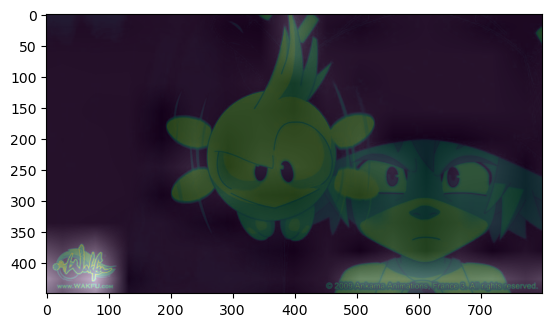

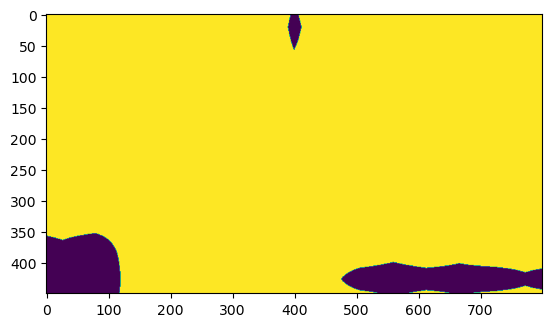

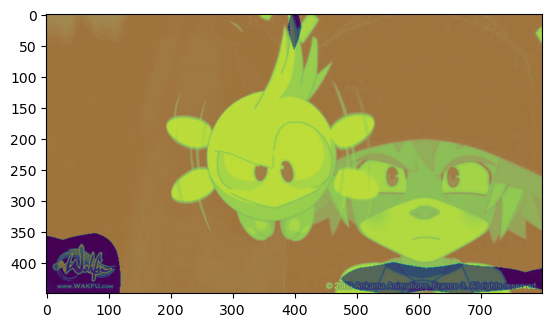

In [47]:
d_ = resize(d, (im.shape[0],im.shape[1]), order=1, mode='reflect')

plt.figure()
plt.imshow(im)
plt.imshow(d_, cmap=plt.cm.gray, alpha=0.7)
plt.show()

from skimage.filters import threshold_otsu

t = threshold_otsu(d_)
mask = d_<t

plt.figure()
plt.imshow(mask)
plt.show()

plt.figure()
plt.imshow(im)
plt.imshow(mask, alpha=0.5)
plt.show()

**Need more help? You can check the following videos:**

* [Manual thresholding](https://www.youtube.com/watch?v=rgKkws_fqz4&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=24)
* [Optimal threshold](https://www.youtube.com/watch?v=7B1cs0PARtg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=25)
* [Otsu threshold](https://www.youtube.com/watch?v=mz26bssSLds&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=26)

## 2. Texture segmentation

Texture segmentation uses regional descriptors to segment the image based on the local texture. A simple algorithm is provided below, which:

* Extract neighborhoods with the sliding window method
* Compute the local maximum on the neighborhood and put it in a "descriptor" image
* Use Otsu thresholding on the descriptor image to segment it
* Display the results

C:\Users\Sandra\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


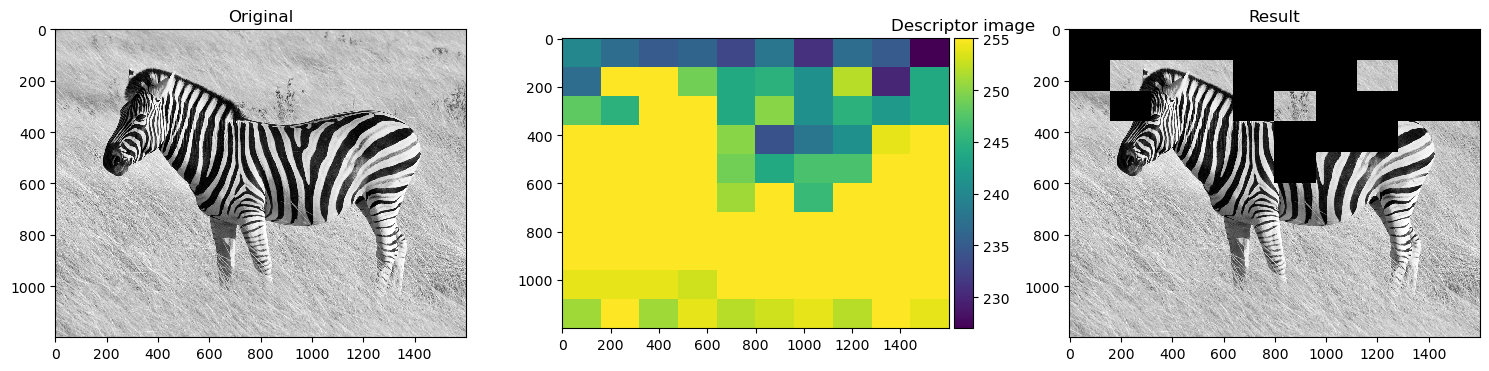

In [4]:
from skimage.filters.rank import entropy
from skimage.filters import threshold_otsu
from skimage import img_as_ubyte

def texture_descriptor(N):
    e = N.max() # Replace with your descriptor
    return e

def sliding_window(im, PATCH_SIZE):
    output = np.zeros((im.shape[0], im.shape[1]))
    for i in range(0, im.shape[0]-PATCH_SIZE[0]+1, PATCH_SIZE[0]):
        for j in range(0, im.shape[1]-PATCH_SIZE[1]+1, PATCH_SIZE[1]):
            patch = im[i:i+PATCH_SIZE[0], j:j+PATCH_SIZE[1]]
            output[i:i+PATCH_SIZE[0], j:j+PATCH_SIZE[1]] = texture_descriptor(patch)
    return output

# Open zebra image as an 8-bit integer grayscale
im = img_as_ubyte(imread("zebra.jpg", as_gray=True))

im_descr = sliding_window(im,(120,160))
T = threshold_otsu(im_descr)
mask = im_descr>T

plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
imshow(im)
plt.title('Original')
plt.subplot(1,3,2)
imshow(im_descr)
plt.title('Descriptor image')
plt.subplot(1,3,3)
imshow(im*mask)
plt.title('Result')
plt.show()

Using the above example as a starting point, replace the "maximum" texture descriptor by properties from the co-occurrence matrix:
* Compute the co-occurrence matrix on the neighborhood (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix)). Test different angles & displacements.
* Test different properties (see [greycoprops](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycoprops))

Try to segment the zebra image as best as you can using those descriptors.

**Need more help? You can check the following videos:**

* [Region descriptors](https://www.youtube.com/watch?v=5F9aPiab8PA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=27)
* [Properties of the co-occurrence matrix](https://www.youtube.com/watch?v=NR3vrkZ9tyg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=28)
* [Texture segmentation](https://www.youtube.com/watch?v=b-SGhLu-R0c&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=29)

## 3. Region growing

In region growing algorithms, we start from "markers" which act as seed points, and grow the segmented regions from those markers. A well-known region-growing algorithm uses the watershed transform. The example below uses the watershed transform on the cameraman image, with hand-picked markers:

In [ ]:
from skimage.morphology import disk
import skimage.filters.rank as skr
from skimage.segmentation import mark_boundaries, watershed
from skimage.io import imread

im = imread('camera.jpg')

smoothing_factor = 4
# Compute the gradients of the image:
gradient = skr.gradient(skr.mean(im, disk(smoothing_factor)), disk(1))

# Hand-picked markers for the road image
markers_coordinates = [
    [10,256], # sky
    [200,150],# cameraman
    [400,20], # grass (left)
    [400,450] # grass (right)
]

markers = np.zeros_like(im)
for i,(row,col) in enumerate(markers_coordinates):
    markers[row,col] = i+1

ws = watershed(gradient, markers)

plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
plt.imshow(im,cmap=plt.cm.gray);
plt.subplot(2,2,2)
plt.imshow(gradient,cmap=plt.cm.gray);
plt.subplot(2,2,3)
plt.imshow(ws);
plt.subplot(2,2,4)
plt.imshow(mark_boundaries(im,ws));

Adapt this method to work on the road image.

Can you find a way to automatically determine the markers?

In [ ]:
im = imread('road.jpg')

imshow(im)


# Your code here


Another use of the watershed transform is to separate overlapping object, as in the image below.

* Compute the [distance transform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.distance_transform_edt.html#scipy.ndimage.distance_transform_edt) of the image.
* Use the result to automatically find good markers.
* Use the watershed transform to separate the three objects.

In [ ]:
from scipy.ndimage import distance_transform_edt
from skimage.color import rgb2gray

im = rgb2gray(imread('separ.png'))==0
imshow(im)

# Your code here


**Need more help? You can check the following videos:**

* [Markers for region growing](https://www.youtube.com/watch?v=3e0-rE9zhFk&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=30)
* [Watershed transform](https://www.youtube.com/watch?v=GuVp7dlzEKE&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=31)
* [Distance transform](https://www.youtube.com/watch?v=s1eABOdNnVg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=32)

## 4. Object features

The next step after segmentation is often to extract object features in order to recognize, classify, or measure information about the objects.

Starting from the example below:

1. **Extract connected components** (see [label()](http://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=label#skimage.measure.label)) of the shapes image and **display the centroid of the objects** (see [regionprops()](http://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=regionprops#skimage.measure.regionprops))
1. For each image label, **extract the coordinates of the contour** (see [find_contours()](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.find_contours)) and **find the corners** of each objects.
1. Suggest a method to **classify the objects** in different categories.

In [ ]:
from skimage.measure import label, regionprops,find_contours

im = (imread('shapes.png')[:,:,0]>0).astype(int) #binarize & cast to integer to make it easier to process later

plt.figure(figsize=(15,15))
plt.imshow(im)
plt.show()

In [ ]:

# Your code here


**Need more help? You can check the following videos:**

* [Object labeling & features](https://www.youtube.com/watch?v=7bOH4E7c8gU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=33)

# Coding project - Tumour segmentation

The image below is a slice of a brain MRI with a large tumour in it. The goal of this project is to create an algorithm to automatically segment the tumour.

Given that the resolution of the image is of 0.115 cm/px in both axis, estimate the area of the tumour (in cm²). 

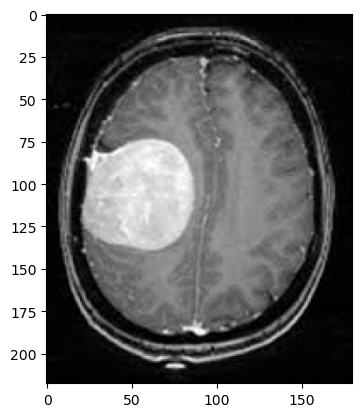

C:\Users\Sandra\AppData\Local\Temp\ipykernel_52788\35702547.py:27: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  gradr = skr.gradient(im_[:,:,0],disk(5)).astype('int');
C:\Users\Sandra\AppData\Local\Temp\ipykernel_52788\35702547.py:29: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  gradg = skr.gradient(im_[:,:,1],disk(5)).astype('int')
C:\Users\Sandra\AppData\Local\Temp\ipykernel_52788\35702547.py:30: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  gradb = skr.gradient(im_[:,:,2],disk(5)).astype('int')
C:\Users\Sandra\AppData\Local\Temp\ipykernel_52788\35702547.py:36: FutureWarning:

In [93]:
from skimage.io import imread,imsave,imshow
from matplotlib.pyplot import cm
from skimage.feature import peak_local_max
from scipy.ndimage import distance_transform_edt
from skimage.color import rgb2hed, rgb2hsv, rgb2gray
from skimage.filters import threshold_otsu, gaussian, sobel
from skimage.morphology import opening,closing,disk
from skimage.segmentation import mark_boundaries
from skimage import util

import skimage.filters.rank as skr
import matplotlib.pyplot as plt
import numpy as np

im = imread('mri_brain.jpg', as_gray=False)
plt.figure()
plt.imshow(im)
plt.show()


h,bins = np.histogram(im,range(257))
from skimage.feature import peak_local_max

def get_markers(im, my_indices=False):

    im_ = gaussian(im, sigma=4)
    gradr = skr.gradient(im_[:,:,0],disk(5)).astype('int');
    #gradr = util.img_as_ubyte(skr.gradient(im_[:,:,0],disk(5)))
    gradg = skr.gradient(im_[:,:,1],disk(5)).astype('int')
    gradb = skr.gradient(im_[:,:,2],disk(5)).astype('int')
    
    grad = gradr+gradg+gradb
    
    #show_image(grad)

    max = peak_local_max(grad.max()-grad,threshold_rel=0.5, min_distance=22,indices=my_indices)
    res = [max,grad]
    return res

[markers,grad] = get_markers(im, False)



C:\Users\Sandra\AppData\Local\Temp\ipykernel_52788\35702547.py:27: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  gradr = skr.gradient(im_[:,:,0],disk(5)).astype('int');
C:\Users\Sandra\AppData\Local\Temp\ipykernel_52788\35702547.py:29: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  gradg = skr.gradient(im_[:,:,1],disk(5)).astype('int')
C:\Users\Sandra\AppData\Local\Temp\ipykernel_52788\35702547.py:30: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  gradb = skr.gradient(im_[:,:,2],disk(5)).astype('int')
C:\Users\Sandra\AppData\Local\Temp\ipykernel_52788\35702547.py:36: FutureWarning:

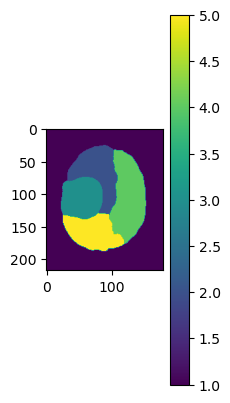

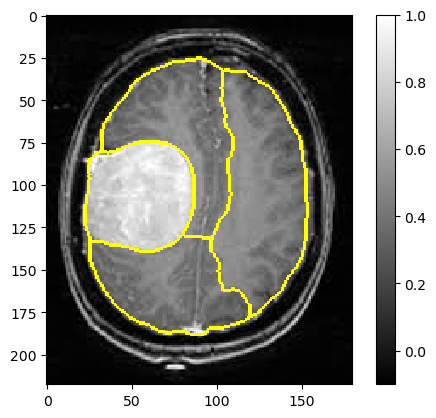

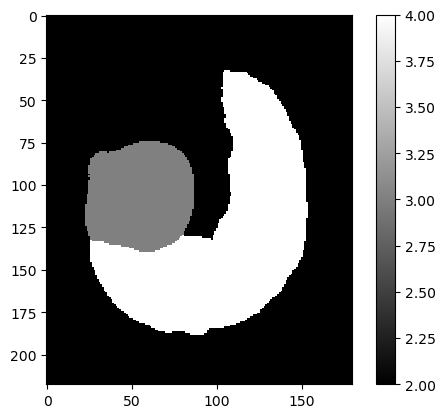

In [94]:
## Need to compute Markers with "indices" set to False
from skimage.measure import label
from skimage.segmentation import watershed
from skimage.segmentation import mark_boundaries
[markers,grad] = get_markers(im, False)
markers = label(markers)

ws = watershed(grad, markers)
boundaries = mark_boundaries(im,ws)

plt.imshow(boundaries)
plt.subplot(1,3,3)
plt.imshow(ws)
plt.colorbar()
plt.show()

show_image(boundaries)
show_image(ws)



Total area : 46.075900000000004 cm^2


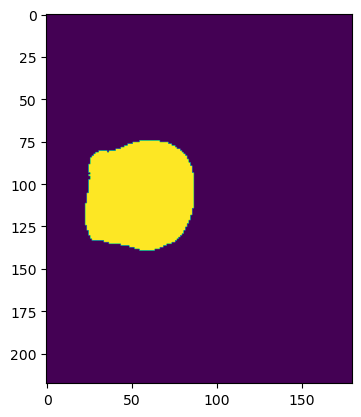

In [95]:
labels, counts = np.unique(ws, return_counts=True)
tumor = labels[2]
n_pixels = counts[2]
area_by_pixel = 0.115**2 # cm^2/px
total_area = n_pixels*area_by_pixel
print("Total area : {} cm^2".format(total_area))

plt.figure()
plt.imshow(ws==tumor)
plt.show()
